<a href="https://colab.research.google.com/github/AshuKoche/Project-on-Global-Terrorism-Dataset/blob/main/GTD%20on%20Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Global Terrorism Dataset**



##### **Project Type**    - EDA
##### **Contribution**    - Individual


# **Project Summary -**

**The Global Terrorism Database (GTD) is a comprehensive dataset of terrorist events around the world from 1970 to 2017. The dataset contains over 181,691 incidents, including information on the date, location, weapons used, and casualties.**

In this project, we will use Python to explore and analyze the GTD, with the goal of gaining insights into the patterns and trends of global terrorism.

* Once we have preprocessed the data, we will use a variety of techniques to explore the patterns and trends of global terrorism. This will include visualizations using matplotlib and seaborn, as well as statistical analysis using NumPy. We will explore questions such as:

>What are the most common types of terrorist attacks?

>Which countries have experienced the most terrorist attacks?

>How has the frequency of terrorist attacks changed over time?
etc...

The world can expect such kind of efforts from, every keen and kind Data Enthusiast, which would generate relevant insights regarding ongoing terror attacks. These steps would help countries in order to formulate relevant policies and form a better coalition, and cooperation and implement those comprehensive steps in order to deal with terrorism.


**By the end of this project, we will have gained a deeper understanding of the nature of global terrorism and the factors that contribute to it. We will also have developed a range of skills in data analysis and visualization using Python.**

# **Problem Statement**


**Understanding Global Terrorism**


**Terrorism is a complex and multifaceted phenomenon that affects countries and communities around the world. The Global Terrorism Database (GTD) is a valuable resource for studying the patterns and trends of terrorism, but analyzing such a large and complex dataset can be a daunting task.** Therefore, the problem statement for this project is to use Python to explore and analyze the GTD, with the goal of gaining insights into the nature and causes of global terrorism.


***The project will address the following questions:***

* Which countries are most affected by terrorism, and what factors contribute to their vulnerability?
* What are the most common types of terrorist attacks?
* How do they impact different parts of the world?
* How has the frequency of terrorist attacks changed over time?
* Are there any patterns or trends in the types of weapons used in terrorist attacks?
* Which types of weapons are used most in different types of attacks?
* What is the number of attacks in specified regions?
* What is the categorisation of different affected property types in various Regions.
* Which weapons are used in specific regions according to the target type?

#### **Define Your Business Objective?** 

This project aims to contribute to a better understanding of the causes and consequences of terrorism, and to inform policy and practice in the fields of security, conflict resolution, and development. The project will use Python to extract, preprocess, analyze, and visualize the data from the GTD, and will employ a range of statistical. Ultimately, the project will demonstrate the Python as a tool for data-driven research and analysis in the field of global security.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [46]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import missingno as msno



!pip install plotly.express
import plotly.express as px
from plotly.offline import iplot
import plotly.graph_objs as go
import plotly.figure_factory as ff

import folium  # to plot the choropleth map
import requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


######  I used the plotly for most of the visualization,due to its richness in visuals. But When I completed my whole project and I tried to save the file in github, the plots were not showing. Even the space was not empty for the plots. So I used kaleido to create those files in png format. Then only it appears.

In [ ]:
pip install --upgrade "kaleido==0.1.*"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 MB 11.0 MB/s eta 0:00:00


### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [54]:
# Importing the dataset
path = '/content/drive/MyDrive/Alma Better /Capstone Project/Global Terrorism Data.csv'
df_main = pd.read_csv(path, encoding = "latin",low_memory = False)

### Dataset First View

In [55]:
# Dataset First 
df_main.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


### Dataset Rows & Columns count

In [56]:
# Dataset Rows & Columns 
df_main.shape

(181691, 135)

### Dataset Information

In [57]:
# Dataset Info 
# df_main.info()

# Also we can use  
df_main.info(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 135 columns):
 #    Column              Dtype  
---   ------              -----  
 0    eventid             int64  
 1    iyear               int64  
 2    imonth              int64  
 3    iday                int64  
 4    approxdate          object 
 5    extended            int64  
 6    resolution          object 
 7    country             int64  
 8    country_txt         object 
 9    region              int64  
 10   region_txt          object 
 11   provstate           object 
 12   city                object 
 13   latitude            float64
 14   longitude           float64
 15   specificity         float64
 16   vicinity            int64  
 17   location            object 
 18   summary             object 
 19   crit1               int64  
 20   crit2               int64  
 21   crit3               int64  
 22   doubtterr           float64
 23   alternative         float64
 24 

#### Duplicate Values

In [58]:
# Dataset Duplicate Value Count
len(df_main[df_main.duplicated()])

0

#### Missing Values/Null Values

In [59]:
# Missing Values/Null Values Count
print(df_main.isnull().sum())

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64


<Axes: >

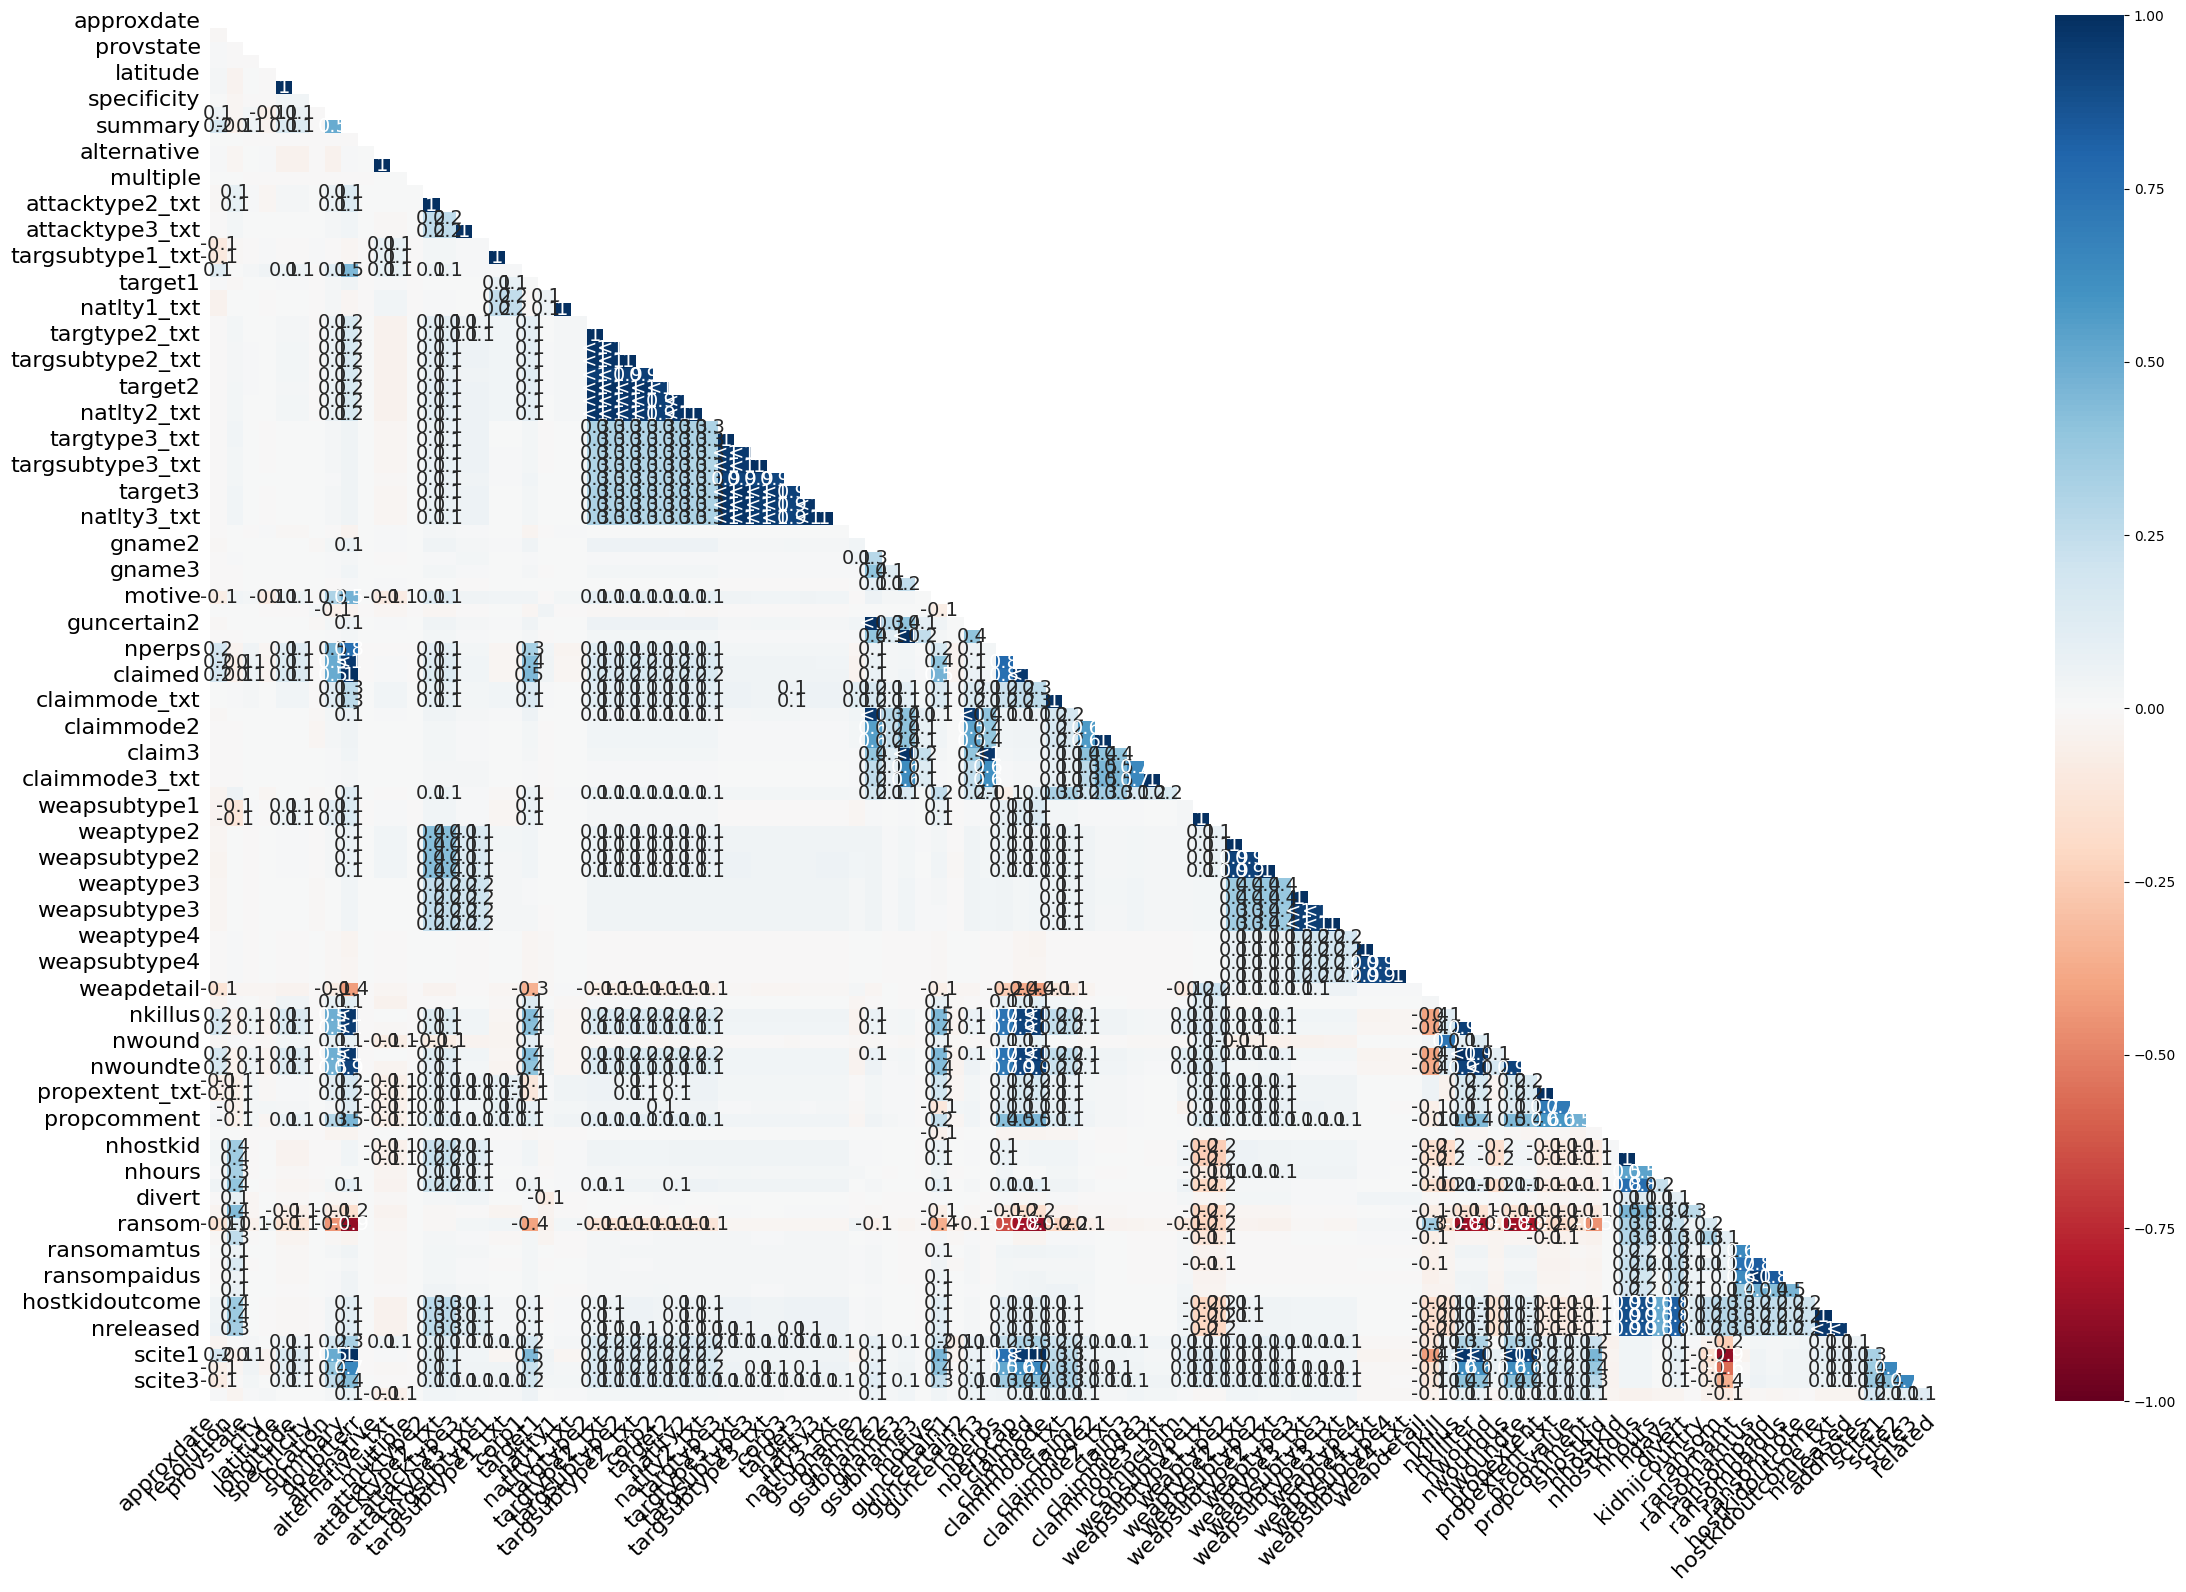

In [60]:
msno.heatmap(df_main,figsize = (28,18))

<Axes: >

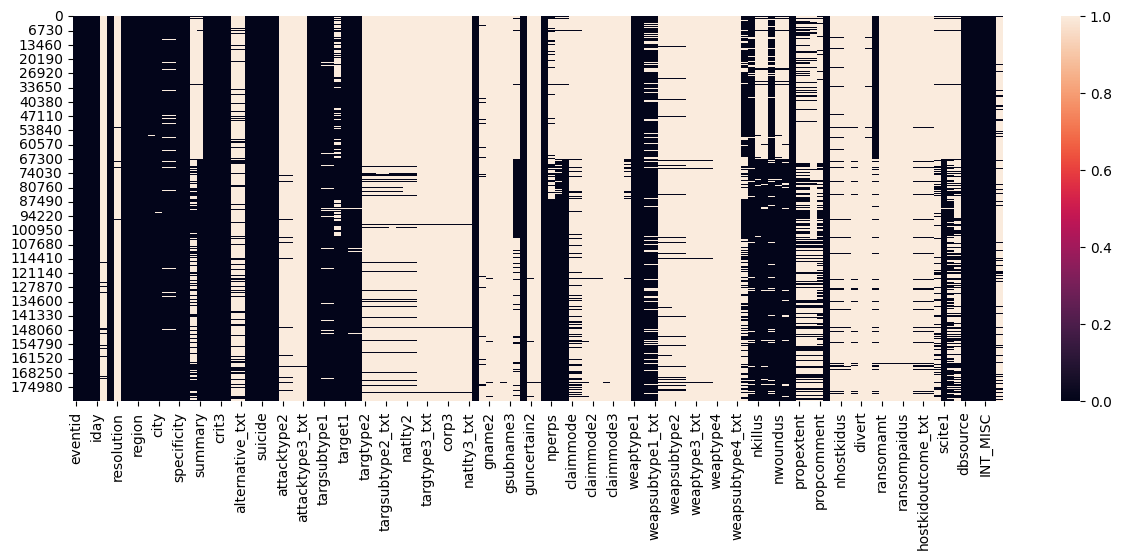

In [61]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sn.heatmap(df_main.isnull())

### What did you know about your dataset?

>The Global Terrorism Database (GTD) is a well-known open-source dataset that contains information on terrorist attacks around the world from 1970 to 2017, containing 206 Countries. 

>The dataset includes detailed information on the date, location, weapons used, and casualties of terrorist attacks. It contains over 181691 incidents in different Regions. 

>The above dataset has 181691 rows and 135 columns. There are a ratio of 3/5 null values in the dataset and no duplicate values in it. 

## ***2. Understanding Your Variables***

In [62]:
# Dataset Columns
df_main.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [63]:
# Dataset Describe
df_main.describe()

# df_main.describe(include='all')

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


### Variables Description 

* Note: - There are 135 columns, hence keeping important in the list. 

* **iyear                :**Year of the attack

* **imonth               :**Month of the attack

* **iday                 :**Date of the attack

* **country_txt          :**The names of the 205 attacked countries

* **region_txt           :**12 Region

* **city                 :**The city's name, which was attacked

* **attacktype1_txt      :**The list of attack type

* **targtype1_txt        :**The main target of the attack

* **motive               :**Motive of the attack

* **weaptype1_txt        :**The types of weapons used to attack the country/region

* **propextent_txt       :**Range of cost for the property destroyed

* **propvalue            :**The actual cost of the property destroyed


### Check Unique Values for each variable.

In [64]:
# Check Unique Values for each variable.
for i in df_main.columns.tolist():
  print("No. of unique values in ",i,"is",df_main[i].nunique(),".")

No. of unique values in  eventid is 181691 .
No. of unique values in  iyear is 47 .
No. of unique values in  imonth is 13 .
No. of unique values in  iday is 32 .
No. of unique values in  approxdate is 2244 .
No. of unique values in  extended is 2 .
No. of unique values in  resolution is 1859 .
No. of unique values in  country is 205 .
No. of unique values in  country_txt is 205 .
No. of unique values in  region is 12 .
No. of unique values in  region_txt is 12 .
No. of unique values in  provstate is 2855 .
No. of unique values in  city is 36674 .
No. of unique values in  latitude is 48322 .
No. of unique values in  longitude is 48039 .
No. of unique values in  specificity is 5 .
No. of unique values in  vicinity is 3 .
No. of unique values in  location is 44109 .
No. of unique values in  summary is 112492 .
No. of unique values in  crit1 is 2 .
No. of unique values in  crit2 is 2 .
No. of unique values in  crit3 is 2 .
No. of unique values in  doubtterr is 3 .
No. of unique values in  

## 3. ***Data Wrangling***

### Data Wrangling Code

In [65]:
# Write your code to make your dataset analysis ready.
# Create a copy of the current dataset and assigning to df1
df1=df_main.copy()

In [66]:
# Creating the new data frame with important columns only
df = df1[['iyear','imonth', 'iday', 'country_txt','region_txt', 'provstate', 'city','latitude','longitude', 'attacktype1_txt', 'targtype1_txt', 'corp1','target1','natlty1_txt','motive','weaptype1','weaptype1_txt','addnotes','scite1','scite2','scite3','dbsource','property', 'propextent', 'propextent_txt','propvalue' ]]

In [67]:
# Cheking new data frame data
df.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,attacktype1_txt,...,weaptype1_txt,addnotes,scite1,scite2,scite3,dbsource,property,propextent,propextent_txt,propvalue
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,Assassination,...,Unknown,NaN,NaN,NaN,NaN,PGIS,0,NaN,NaN,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),...,Unknown,NaN,NaN,NaN,NaN,PGIS,0,NaN,NaN,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,Assassination,...,Unknown,NaN,NaN,NaN,NaN,PGIS,0,NaN,NaN,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,Bombing/Explosion,...,Explosives,NaN,NaN,NaN,NaN,PGIS,1,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,...,Incendiary,NaN,NaN,NaN,NaN,PGIS,1,NaN,NaN,NaN


In [68]:
#Shape of the New data frame
df.shape

(181691, 26)

In [69]:
# Dataset Columns
df.columns

Index(['iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'provstate',
       'city', 'latitude', 'longitude', 'attacktype1_txt', 'targtype1_txt',
       'corp1', 'target1', 'natlty1_txt', 'motive', 'weaptype1',
       'weaptype1_txt', 'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource',
       'property', 'propextent', 'propextent_txt', 'propvalue'],
      dtype='object')

In [70]:
# Dataset Info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 26 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   iyear            181691 non-null  int64  
 1   imonth           181691 non-null  int64  
 2   iday             181691 non-null  int64  
 3   country_txt      181691 non-null  object 
 4   region_txt       181691 non-null  object 
 5   provstate        181270 non-null  object 
 6   city             181257 non-null  object 
 7   latitude         177135 non-null  float64
 8   longitude        177134 non-null  float64
 9   attacktype1_txt  181691 non-null  object 
 10  targtype1_txt    181691 non-null  object 
 11  corp1            139141 non-null  object 
 12  target1          181055 non-null  object 
 13  natlty1_txt      180132 non-null  object 
 14  motive           50561 non-null   object 
 15  weaptype1        181691 non-null  int64  
 16  weaptype1_txt    181691 non-null  obje

In [71]:
# Dataset Describe
# df_main.describe(include='all')
df.describe()

,iyear,imonth,iday,latitude,longitude,weaptype1,property,propextent,propvalue
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,64065.000000,3.898900e+04
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,6.447325,-0.544556,3.295403,2.088119e+05
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,2.173435,3.122889,0.486912,1.552463e+07
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,1.000000,-9.900000e+01
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,5.000000,0.000000,3.000000,-9.900000e+01
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,6.000000,1.000000,3.000000,-9.900000e+01
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,6.000000,1.000000,4.000000,1.000000e+03
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,13.000000,1.000000,4.000000,2.700000e+09


In [72]:
# rename the columns for better understanding
df.rename(columns ={'iyear':'Year' , 'imonth' : 'Month','iday': 'Date',
                    'country_txt': 'Country','region_txt' : 
                    'Region' ,'attacktype1_txt': 'Attack_type', 
                    'weaptype1':'Weapon Type'}  , inplace=True)

In [73]:
# cheking the Dataset of renamed Columns
df.columns

Index(['Year', 'Month', 'Date', 'Country', 'Region', 'provstate', 'city',
       'latitude', 'longitude', 'Attack_type', 'targtype1_txt', 'corp1',
       'target1', 'natlty1_txt', 'motive', 'Weapon Type', 'weaptype1_txt',
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'property',
       'propextent', 'propextent_txt', 'propvalue'],
      dtype='object')

In [74]:
# Country name
set(df['Country'])

{'Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia-Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Czechoslovakia',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'East Germany (GDR)',
 'East Timor',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Falkland Islands',
 'Fiji',
 'Finland',
 'France',
 'French Guiana',
 'French Polynesia',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guadeloupe',
 'G

In [75]:
# countries have experienced the most terrorist attacks
country_attacked=df['Country'].value_counts()
country_attacked.head(10)

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

In [76]:
# Writing a code to make our dataset analysis ready.

#I required to do grouping. I required to count the desired event.

def Grouping(df,second,*first): # *is used so that I could use multiple inputs.

  '''This function counts the occuerence of desired event.
     first and second is the actual column names'''

  A=df.groupby([*first])[second].count() #Count gives Idea about the frequency or repition.
                                         # It clarifies the idea about number of attacks or number of events occured.
  B=pd.DataFrame(A)                      # Creation of dataframe will help for easy plotting
  return B

def Rename(var,first,second,third,fourth,fifth,sixth):  #After using above function,proper renaming comes through this function.
  '''var=the name of variable
     first and second is the actual column name 
     and the new column name respectively.'''
  #This function is useful for, three columns dataframe.

  new_var=var.rename(columns={first:second}).reset_index()
  A=new_var.rename(columns={third:fourth,fifth:sixth})
  return A

In [77]:
# The number of terror attacks,encountered by individual region.
# The frequency of attacks are arranged in front of every available Region.

country = Grouping(df_main,'country_txt','region_txt','country_txt') #Grouping of columns by user defined function 'Grouping' .

country_file= Rename(country,'country_txt','Country_count','country_txt','Country','region_txt','Region')#For renaming,'Rename function' is used.
country_file

,Region,Country,Country_count
0,Australasia & Oceania,Australia,114
1,Australasia & Oceania,Fiji,17
2,Australasia & Oceania,French Polynesia,3
3,Australasia & Oceania,New Caledonia,31
4,Australasia & Oceania,New Hebrides,1
...,...,...,...
200,Western Europe,Sweden,132
201,Western Europe,Switzerland,111
202,Western Europe,United Kingdom,5235
203,Western Europe,Vatican City,1


In [78]:
# Number of attacks in ascending order with respect to year
attacks_ratio=df['Year'].value_counts().sort_values()
# attacks_ratio

In [79]:
# Number of attacks year wise 
a1=df['Year'].value_counts().sort_values()
a=pd.DataFrame(a1)
Year_of_attacke=a.rename(columns={'Year':'Count of the attack' }).reset_index()
Year_of_attacke

,index,Count of the attack
0,1971,471
1,1973,473
2,1972,568
3,1974,581
4,1970,651
5,1975,740
6,1976,923
7,1998,934
8,2004,1166
9,2003,1278


In [80]:
# types of weapons used in terrorist attacks
w=df['weaptype1_txt'].value_counts().reset_index()
weapons_used=pd.DataFrame(w)
weapons_used

,index,weaptype1_txt
0,Explosives,92426
1,Firearms,58524
2,Unknown,15157
3,Incendiary,11135
4,Melee,3655
5,Chemical,321
6,Sabotage Equipment,141
7,Vehicle (not to include vehicle-borne explosiv...,136
8,Other,114
9,Biological,35


In [81]:
# performing a groupby to identify the loss of property
qwer=df.groupby(['propextent_txt'])['Country'].count().sort_values()
qwsa=pd.DataFrame(qwer).rename(columns={'propextent_txt' : 'Cost of the property'})
property_loss=qwsa.reset_index()
property_loss

,propextent_txt,Country
0,Catastrophic (likely >= $1 billion),6
1,Major (likely >= $1 million but < $1 billion),909
2,Unknown,19846
3,Minor (likely < $1 million),43304


In [82]:
# countries have experienced the most property loss by terrorist attacks
asd = df.groupby(['Country', 'propextent'])['propextent_txt'].count().reset_index()
loss_of_property_country_wise = asd.sort_values(by='propextent_txt', ascending=False)
loss_of_property_country_wise.reset_index()

,index,Country,propextent,propextent_txt
0,169,Iraq,3.0,6665
1,276,Pakistan,3.0,4583
2,1,Afghanistan,3.0,3500
3,159,India,3.0,2376
4,170,Iraq,4.0,2200
...,...,...,...,...
412,42,Bosnia-Herzegovina,2.0,1
413,362,Tanzania,2.0,1
414,290,Poland,2.0,1
415,292,Poland,4.0,1


In [83]:
# The most property loss by terrorist attacks Region wise
# creating the groupby region wise for prperty value
qwe = df.groupby(['Region', 'propextent_txt'])['propextent_txt'].count()

# making datafream for above dataset also renaming "propextent_txt" to make the barplot
q=pd.DataFrame(qwe).rename(columns={'propextent_txt' : 'Count of property'}).sort_values(by= 'Count of property', ascending = False) 

# reseting the index
region_wise_property_loss=q.reset_index()
region_wise_property_loss

,Region,propextent_txt,Count of property
0,Middle East & North Africa,Minor (likely < $1 million),11719
1,South Asia,Minor (likely < $1 million),11464
2,Middle East & North Africa,Unknown,4855
3,South Asia,Unknown,4371
4,Sub-Saharan Africa,Minor (likely < $1 million),4279
5,Western Europe,Minor (likely < $1 million),3916
6,South America,Minor (likely < $1 million),3381
7,Southeast Asia,Minor (likely < $1 million),3106
8,Central America & Caribbean,Unknown,2744
9,Central America & Caribbean,Minor (likely < $1 million),2475


In [84]:
 # Visualization code for the region to check the attack Region wise
map_df=df.groupby('Country')['latitude','longitude'].mean().reset_index()
map_df=map_df.dropna()
map_df


country_file
choro_df=pd.merge(country_file,map_df, how='inner',on='Country')
choro_df
choro_df['text']=choro_df['Country']+ ' - '+ choro_df['Country_count'].astype(str) + ' Attacks'
choro_df

<ipython-input-84-41059dfcf872>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Region,Country,Country_count,latitude,longitude,text
0,Australasia & Oceania,Australia,114,-33.788768,145.436300,Australia - 114 Attacks
1,Australasia & Oceania,Fiji,17,-17.761542,178.246455,Fiji - 17 Attacks
2,Australasia & Oceania,French Polynesia,3,-17.534984,-149.569504,French Polynesia - 3 Attacks
3,Australasia & Oceania,New Caledonia,31,-21.814443,166.116937,New Caledonia - 31 Attacks
4,Australasia & Oceania,New Hebrides,1,-17.734818,168.322029,New Hebrides - 1 Attacks
...,...,...,...,...,...,...
199,Western Europe,Sweden,132,58.374661,15.211598,Sweden - 132 Attacks
200,Western Europe,Switzerland,111,46.833711,7.524300,Switzerland - 111 Attacks
201,Western Europe,United Kingdom,5235,54.250119,-5.582513,United Kingdom - 5235 Attacks
202,Western Europe,Vatican City,1,41.902887,12.453553,Vatican City - 1 Attacks


#### **The number of attacks on different target types according to the differrent attack types specified in the Region**

> E.g In Western Europe, the number of attacks encountered by Private Property due to Armed Assaults.It gives the idea about, most notorious attack type , their frequency and most vulnerable target in every region.


In [85]:
attack_tar=Grouping(df,'targtype1_txt','Region','Attack_type','targtype1_txt')# user defined 'Grouping' function is used.

# Manual renaming, because the number of columns is more than 3.
attack_tar1=attack_tar.rename(columns={'targtype1_txt':'Target_count'}).reset_index()

#First rename equalise columns and rename the repeated column.
#Second renames , remaining columns.
attack_file= attack_tar1.rename(columns={'targtype1_txt':'Target_typ'})
attack_file

,Region,Attack_type,Target_typ,Target_count
0,Australasia & Oceania,Armed Assault,Airports & Aircraft,2
1,Australasia & Oceania,Armed Assault,Business,6
2,Australasia & Oceania,Armed Assault,Educational Institution,1
3,Australasia & Oceania,Armed Assault,Government (Diplomatic),4
4,Australasia & Oceania,Armed Assault,Government (General),8
...,...,...,...,...
1527,Western Europe,Unknown,Tourists,1
1528,Western Europe,Unknown,Transportation,8
1529,Western Europe,Unknown,Unknown,14
1530,Western Europe,Unknown,Utilities,1


### What all manipulations have you done and insights you found?

**All Manipulations**

>  1.Create Functions.\
2.Grouping the columns.\
3.Renaming columns.

Exploring this dataset help me to identify patterns and trends in the data. This involves creating visualizations such as Line plot, histograms, and heatmaps to visualize the distribution of data.

The columns on which I worked, contained no null values, hence I didn't use any operation regarding filling or manipulating those values.
There were neither duplicate columns nor rows.

It has been found out that the Region **Middle East** and **North Africa** is most affected and enocountered with largest number of attacks.

Countries like Iraq , Afghanistan , Pakistan and India are at the top of list with subsequent maximum number of attacks.
* Iraq - **24636**
* Pakistan - **14368**
* Afghanistan - **12731**
* India - **11960**

As weapons,Bombing weapons and Firearms are the most frequent weapons used by terrorists, in every attack type. E.g In Explosion and Assassination attack types, Bombing and firearms have been used most frequently.

**Bombing and Explosions** is one of attack types which have been used in highest number of attacks.
It has been used in near about 30000 attacks.

After that, In every region only Private Properties are most affected. Even in South Asia Private Properties are highly damaged by terror attacks.

## ***4. Data Visualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - **Lineplot**

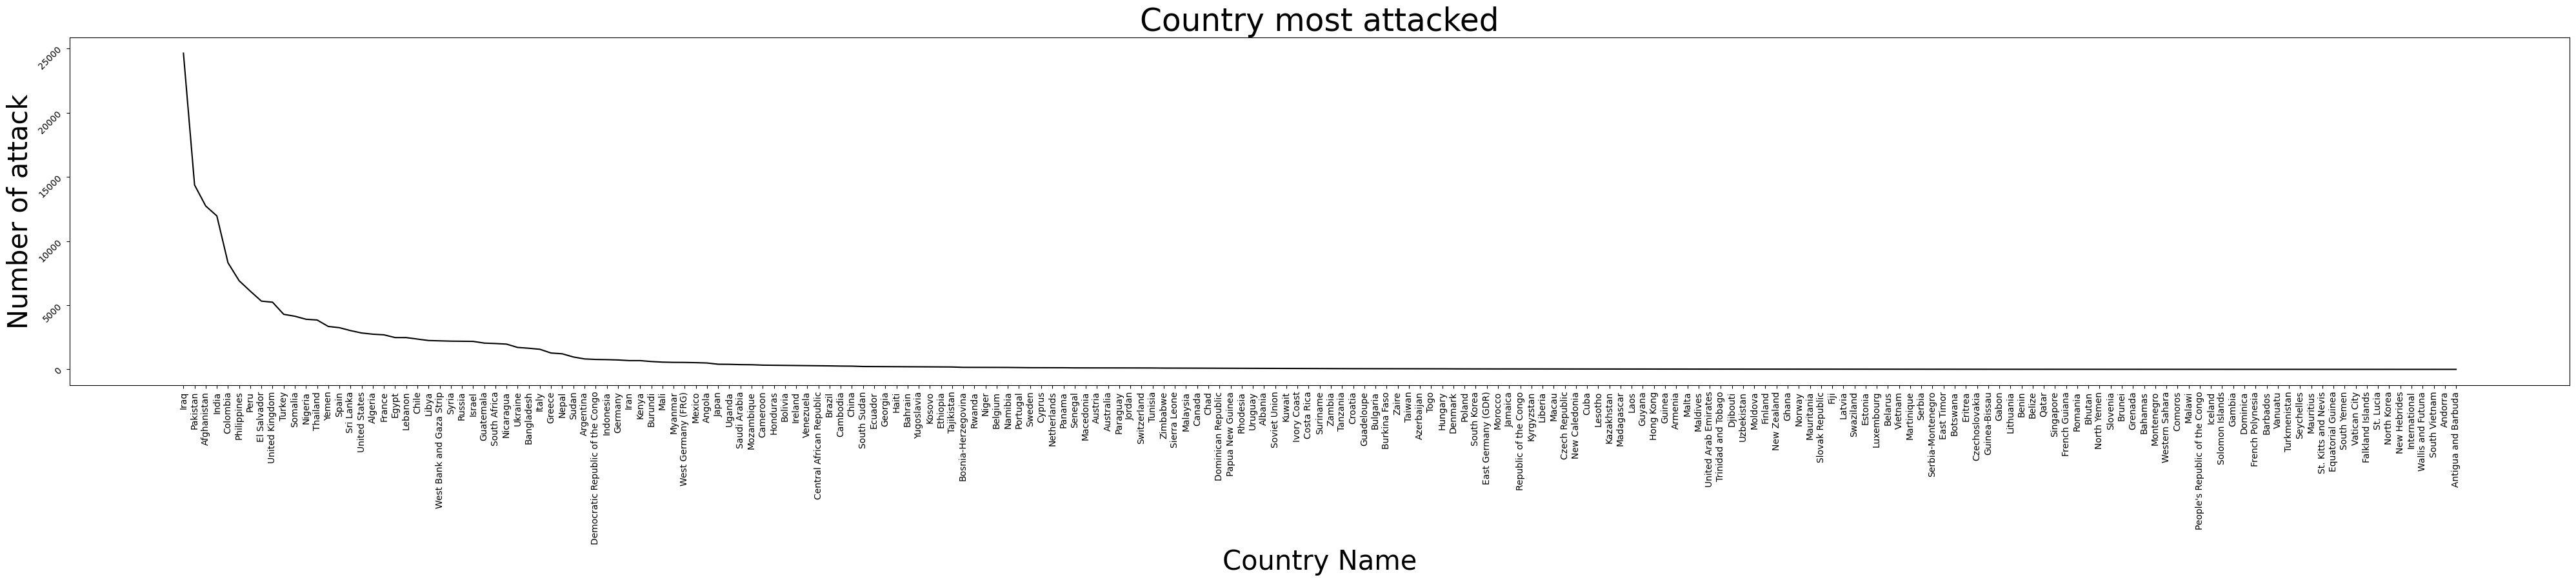

In [86]:
# Pulling the data from above Dataset
plt.rcParams['figure.figsize'] = (50, 7)
# Creating the plot object
plt.plot(country_attacked, color = 'black')

# providing the rotation for x and y values
plt.xticks(rotation = 90)
plt.yticks(rotation = 45)

# Labaling the plot
plt.title('Country most attacked',fontsize=35)
plt.ylabel('Number of attack',fontsize=30)
plt.xlabel('Country Name', fontsize=30, rotation = 0);

##### 1. Why did you pick the specific chart?

**Answer Here**\
By adding lines to the same plot, you can easily compare changes in different variables. We could use a line plot to compare the number of terrorist attacks in different countries over time.

##### 2. What is/are the insight(s) found from the chart?

**Answer Here**\
From the above Lineplot, I am able to identify the top 10 countries that were attacked the most and the 10 safest countries to be counted with a smaller number of attacks.

The above data shows, we can analyze that the most attacked country is Iraq, Pakistan, Afghanistan, India, Colombia, Philippines, Peru, El Salvador, United Kingdom, and Turkey.

If we identify, the data represents how secure the countries are compared to others.  

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer Here**\
**This Dataset is very useful to understand the core depth of the security followed by the countries, which needs to be improved.**

This data represents the comparison of the countries that help them to build policymakers and security agencies to focus their efforts and resources to mitigate terrorism in Iraq, Pakistan, Afghanistan, India, Colombia, Philippines, Peru, El Salvador, United Kingdom, and Turkey.

#### Chart - 2 - **Barplot**

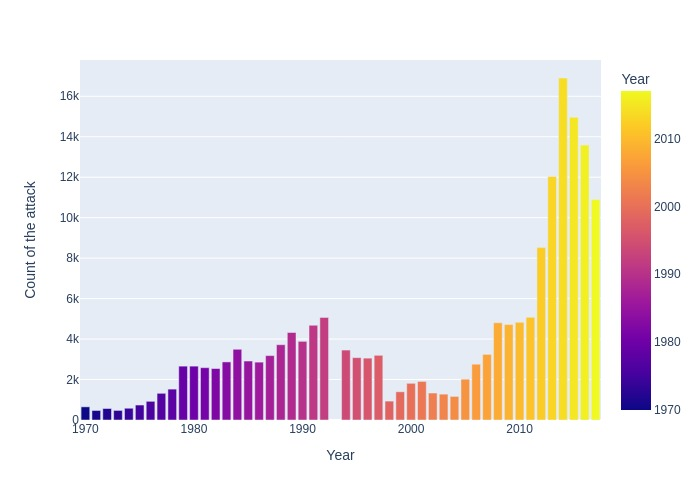

In [87]:
# Year-wise representation of attacks
import plotly.express as px 

fig = px.bar(Year_of_attacke, x="index", y="Count of the attack", color="index" ,color_discrete_sequence=px.colors.qualitative.Plotly, labels={'index':'Year'})

fig.show('jpg')

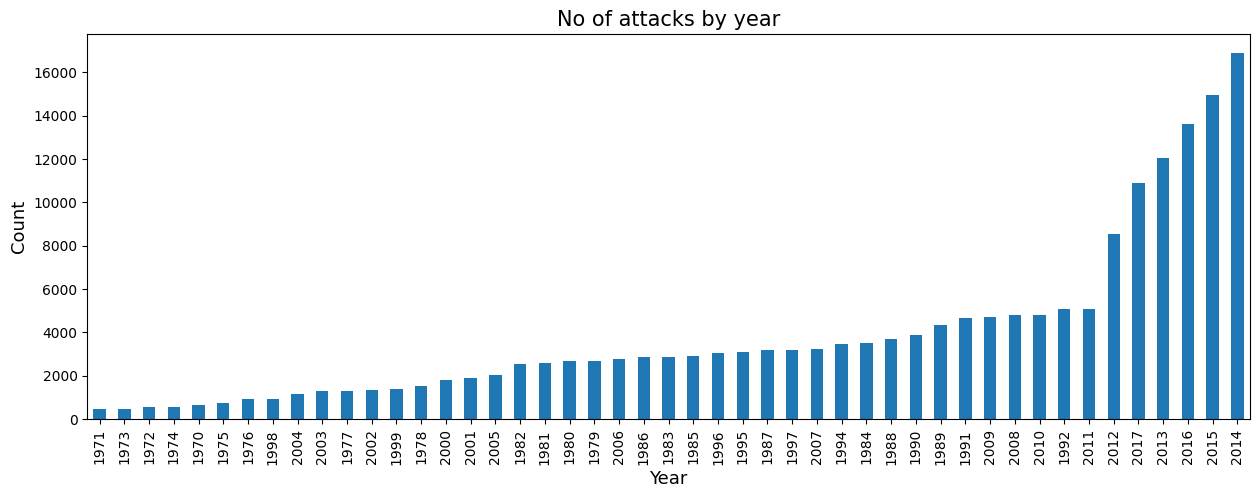

In [88]:
# Number of attacks in ascending order with respect to year to compare the cases
plt.rcParams['figure.figsize'] = (15, 5)
# Create the plot object
attacks_ratio.plot(kind='bar')
plt.title('No of attacks by year', fontsize=15)
plt.ylabel('Count', fontsize=13)
plt.xlabel('Year', fontsize=13);

##### 1. Why did you pick the specific chart?

**Answer Here**\
Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Bar charts show proper data that people can understand easily. 

##### 2. What is/are the insight(s) found from the chart?

**Answer Here**\
The two barplots represent the value count of the attack every year. The significant attacks were happened in 2014. Also, the number of terrorist attacks is increasing every year.

If we observe between 2000 to 2005 the attacks were slightly reduced compared to the rest of the years. Also, after 2014 the attack ratio is reducing in 2015,2016, and 2017. **That represents after 2014 the countries are taking small steps to improve security on a priority basis.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer Here**\
Calculating the number of terrorist attacks on countries can help in assessing the level of risk of terrorist attacks for businesses or organizations operating in those countries. So that they can improve security. 

#### Chart - 3 - **Line Plots with column encoding color**

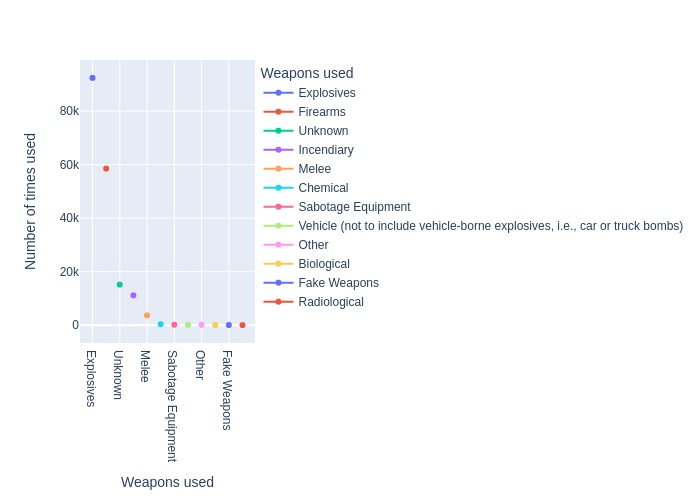

In [89]:
# Types of wepon used by the attakeres
# 'index' represents the name of the weapons and 'weaptype1_txt' represents the number of times used the weapons

fig = px.line(weapons_used, x='index', y='weaptype1_txt', color='index',labels={'index':'Weapons used', 'weaptype1_txt':'Number of times used'},markers=True)
fig.show('jpg')

##### 1. Why did you pick the specific chart?

**Answer Here**\
I use the Line plots to show patterns in data that occur over a continuous variable, such as the count of weapons used. By plotting the data points along the continuous variable, we can quickly see if there are any patterns or trends.

##### 2. What is/are the insight(s) found from the chart?

**Answer Here**\
From above Line plot the types of weapons used in terrorist attacks is providing the insight into the types of weapons that are most commonly used by terrorists which is **Explosives** and **Firearms**.
This can suggest that the group has access to more sophisticated and advanced weapons.

Here the weapon used in a terrorist attack is Unknown, it may be more difficult to analyze the attack and draw conclusions. The lack of information about the weapon used can limit the available data and make it harder to draw definitive insights.

**The count of the weapons used for attack**

* Explosives: 92.426k
* Firearms: 58.524k
* **Unknown: 15.157k**
* Incendiary: 11.135k
* Melee: 3655
* Chemical: 321
* Sabotage Equipment: 141
*	Vehicle (not to include vehicle-borne explosiv:	136
*	Other: 114
*	Biological: 35
*	Fake Weapons: 33
*	Radiological: 14

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer Here**\
This information can be useful for law enforcement agencies and military personnel to help them better prepare for future attacks.

Gathering intelligence on the group's activities and intentions can help to identify potential threats and prevent future attacks.

**The Unknown weapon used in attack, it may increase the risk of copycat attacks by other groups or individuals. The lack of information about the weapon used may make it easier for other groups to emulate the attack or develop similar tactics, making it more challenging for us to prevent future attacks.**

#### Chart - 4 - **Barplot**

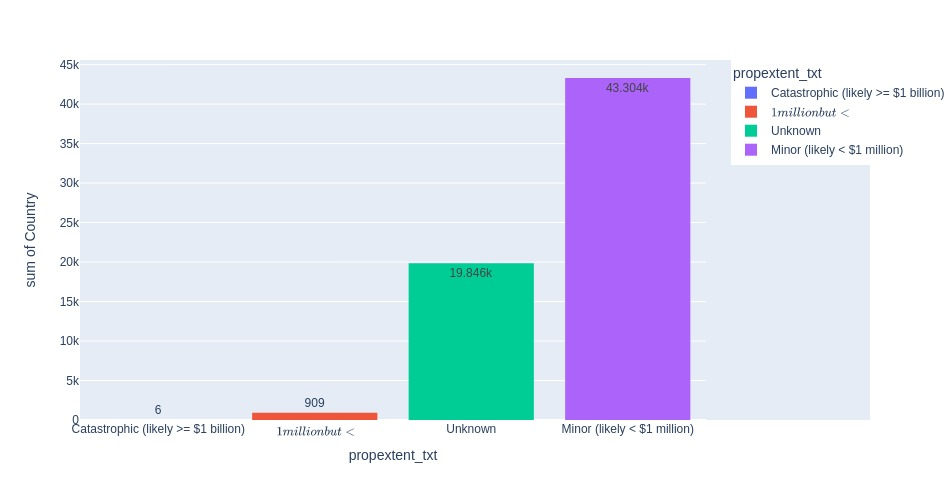

In [90]:
# Visualizing code for people who lost their property in an attack
fig = px.histogram(property_loss, x='propextent_txt',y = 'Country',color = 'propextent_txt',text_auto = True)
fig.update_layout(width=950,height=500)
fig.show('jpg')
# Providing the rotation for the name label on x-axis for suitable view

##### 1. Why did you pick the specific chart?

Bar plots are visually appealing and can be customized with different colors and designs to make them more engaging and memorable. Like above bar is just a simple representation of the destroyed property. This can be particularly useful for presentations or reports where I want to capture the audience's attention.

##### 2. What is/are the insight(s) found from the chart?

The above bar plot provides the impact of terrorism on infrastructure, the economy, and the local population. It is showing the cost of repairing or replacing damaged infrastructure, lost productivity, and the impact on tourism and other industries.

We can identify that most of the suffering people are lower-class people which falls under the property loss below $1 million.

* Catastrophic (likely >= $1 billion)	= 6

* Major (likely > = 1 million But < 1 billion) = 909

* Unknown = 19846

* **Minor (likely < $1 million)	= 43304**

(All values are in $)

The property destroyed in terrorist attacks are providing insights into the vulnerability of critical infrastructure of attack. This includes the fear and uncertainty that can result from an attack, as well as the impact on social cohesion and community resilience.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This information can be useful for governments and law enforcement agencies to  understand the threats and develop appropriate countermeasures. **It can also help identify areas where additional resources may be needed to address infrastructure vulnerabilities and other risks.**

#### Chart - 5 - **Choropleth**

In [91]:
# Chart - 1 visualization code
map_df=df_main.groupby('country_txt')['latitude','longitude'].mean().reset_index()
map_df=map_df.rename(columns= {'country_txt':'Country'}).dropna()
map_df


country_file
choro_df=pd.merge(country_file,map_df, how='inner',on='Country')
choro_df
choro_df['text']=choro_df['Country']+ ' - '+ choro_df['Country_count'].astype(str) + ' Attacks'
choro_df

<ipython-input-91-4d37fa236fc5>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Region,Country,Country_count,latitude,longitude,text
0,Australasia & Oceania,Australia,114,-33.788768,145.436300,Australia - 114 Attacks
1,Australasia & Oceania,Fiji,17,-17.761542,178.246455,Fiji - 17 Attacks
2,Australasia & Oceania,French Polynesia,3,-17.534984,-149.569504,French Polynesia - 3 Attacks
3,Australasia & Oceania,New Caledonia,31,-21.814443,166.116937,New Caledonia - 31 Attacks
4,Australasia & Oceania,New Hebrides,1,-17.734818,168.322029,New Hebrides - 1 Attacks
...,...,...,...,...,...,...
199,Western Europe,Sweden,132,58.374661,15.211598,Sweden - 132 Attacks
200,Western Europe,Switzerland,111,46.833711,7.524300,Switzerland - 111 Attacks
201,Western Europe,United Kingdom,5235,54.250119,-5.582513,United Kingdom - 5235 Attacks
202,Western Europe,Vatican City,1,41.902887,12.453553,Vatican City - 1 Attacks


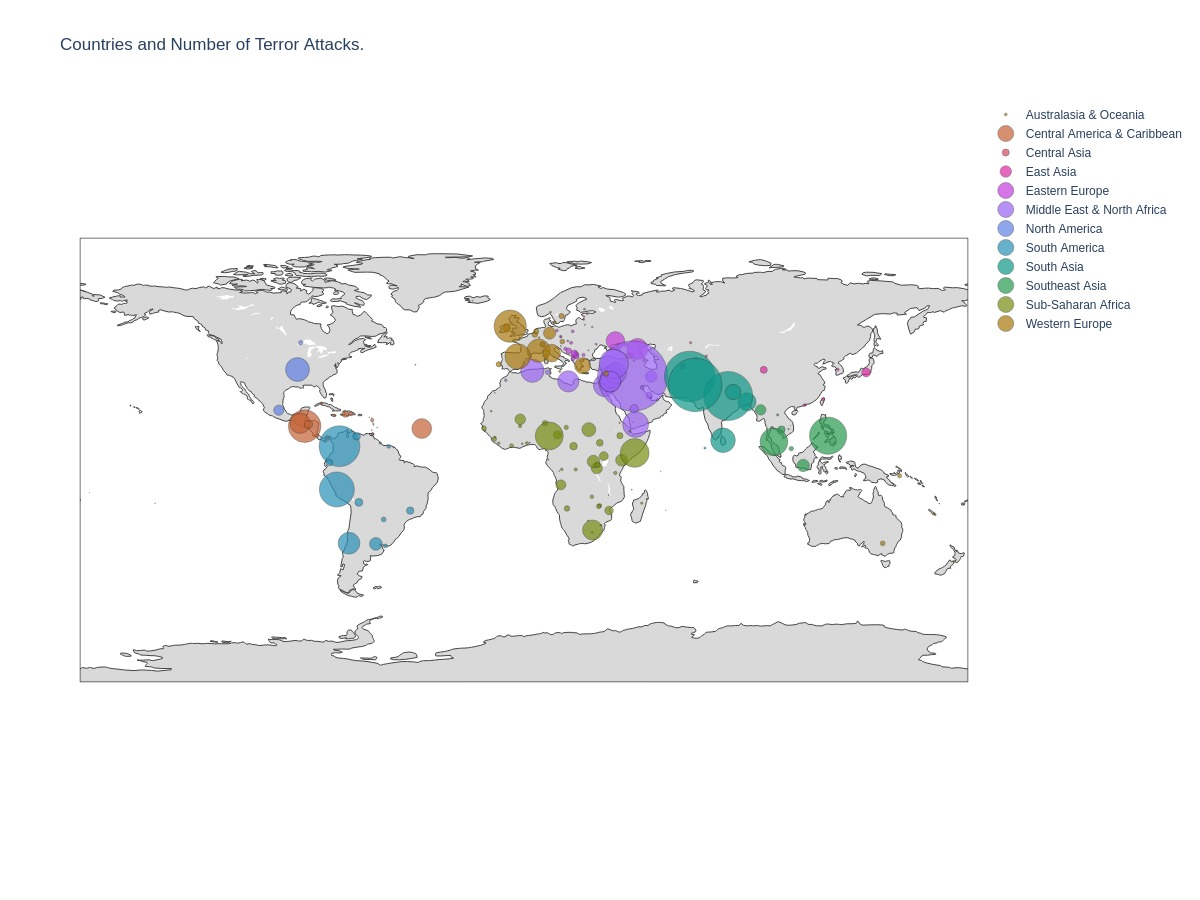

In [92]:
limits = [(0,10),(10,31),(31,39),(39,46),(46,72),(72,95),(95,98),(98,112),(112,121),(121,133),(133,182),(182,203)]
colors1 = ['rgb(167, 119, 12)',
 'rgb(197, 96, 51)',
 'rgb(217, 67, 96)',
 'rgb(221, 38, 163)',
 'rgb(196, 59, 224)',
 'rgb(153, 97, 244)',
 'rgb(95, 127, 228)',
 'rgb(40, 144, 183)',
 'rgb(15, 151, 136)',
 'rgb(39, 153, 79)',
 'rgb(119, 141, 17)',
 'rgb(167, 119, 12)',
 '#2d47f9',
 '#2593ff'] 
cities = []
scale = 5000

fig = go.Figure()

for i in range(len(limits)):
    lim = limits[i]
    df_sub = choro_df[lim[0]:lim[1]]
    fig.add_trace(go.Scattergeo(
        locationmode = "country names" ,
        lon = df_sub['longitude'],
        lat = df_sub['latitude'],
        text = df_sub['text'],
        marker = dict(
            size = df_sub['Country_count']/10,
            color = colors1[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = df_sub['Region'][lim[0]]))

fig.update_layout(
        title_text = 'Countries and Number of Terror Attacks.',
        showlegend = True,
        geo = dict(
            scope = 'world',
            landcolor = 'rgb(217, 217, 217)'
        )
    )
fig.update_layout(width=1200,height=900)
fig.show('jpg')

##### 1. Why did you pick the specific chart?

Choropleth maps can reveal geographic patterns in data that might not be immediately obvious when looking at raw numbers or tables. This can be useful for identifying regional variations or trends in data.

It uses color to represent different levels of data, making it easy to interpret and compare data across different regions. This can be especially useful when the data covers a large area, as it can be difficult to make sense of raw numbers without a visual aid.

##### 2. What is/are the insight(s) found from the chart?

Analyzing the property destroyed in terrorist attacks over different regions can provide insights into the economic impact of terrorism in those regions. This includes the cost of repairing or replacing damaged infrastructure, lost productivity, and the impact on tourism and other industries.

The Choropleth is showing the most impacted Region is the **Middle East & North Africa**. The Region which is less affected by this attack over the cost is **Australasia & Oceania**. The major loss of the region 

The property destroyed in terrorist attacks over different regions over time can reveal trends in the types of targets being attacked and the impact of those attacks.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Insights will help the countries to connect with each other and instigate regional cooperation between countries, for better and strong diplomatic relations. Which could lead them towards comprehensive joint anti-terror policies.

The major loss of the region **Middle East & North Africa** as well as **South Asia** affects all the economic growth hence this region needs to develop strategies to address those vulnerabilities.

#### Chart - 6 - **Histogram**

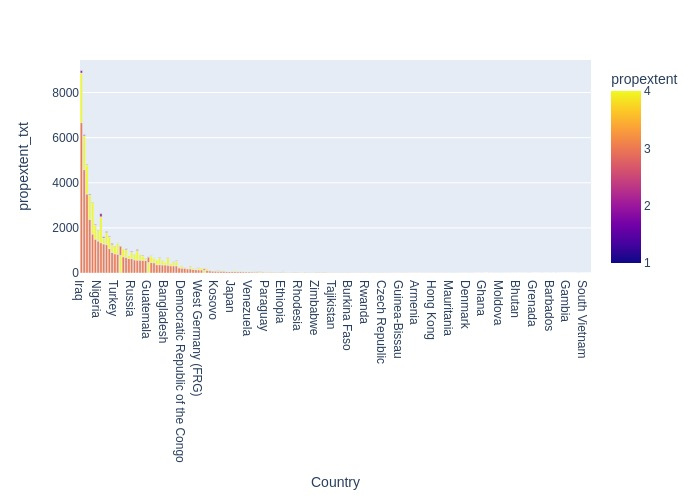

In [93]:
# Visualization for the property loss country wise
import plotly.express as px 

fig = px.bar(loss_of_property_country_wise, x="Country", y="propextent_txt", color="propextent" ,color_discrete_sequence=px.colors.qualitative.Plotly)
# Here "propextent_txt" shows the total number of property destroyed
fig.show('jpg')


# To check the top 10 country that lost there most of the property also, we can zoom on top country
# fig = px.bar(loss_of_property_country_wise[:15], x="Country", y="propextent_txt", color="propextent" ,color_discrete_sequence=px.colors.qualitative.Plotly)

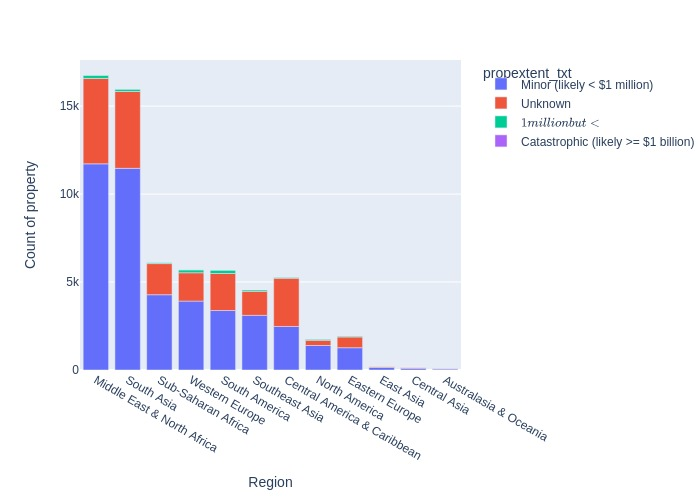

In [94]:
# VIsualisation for the property loss region wise
import plotly.express as px 

fig = px.bar(region_wise_property_loss, x="Region", y="Count of property", color="propextent_txt" ,color_discrete_sequence=px.colors.qualitative.Plotly)

fig.show('jpg')

##### 1. Why did you pick the specific chart?

**Answer Here**\
Histogram shows the direct count of the number of attacks, in every region.
It expresses the desired piece of information very relevantly. We can directly find out which region is most affected according to property loss.

##### 2. What is/are the insight(s) found from the chart?

**Answer Here**\
The chart is providing the direct number for the frequency of attacks in different Regions/Countries. It clarifies the actual count of terrorist attacks in those regions/countries which we have found out in the above **Choropleth map**. However, this histogram shows how much the countries suffered from property loss with every attack. All the values which are shown for the property loss are in $.



1.   **Middle East & North Africa** - 50474
 > Minor (likely < 1 million)	= **11719**\
 > Unknown = **4855**\
 > Major (likely >= 1 million but < $1 billion)	= **167**

2.   **South Asia** - 44974
 >  Minor (likely < 1 million)	= **11464**\
 >  Unknown = **4371**\
 >  Major (likely >= 1 million but < 1 billion)	= **117**

3.   **South America** -18978
 >  Minor (likely < 1 million)	= **11719**\
 >  Unknown = **4855**\
 >  Major (likely >= 1 million but < 1 billion)	= **167**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer Here**

The information would help countries common in the region to cultivate a cumulative and collective plan against terrorist attacks. Also, to make the economy strong enough to sustain such attack.

#### Chart - 7- **Sunburst**

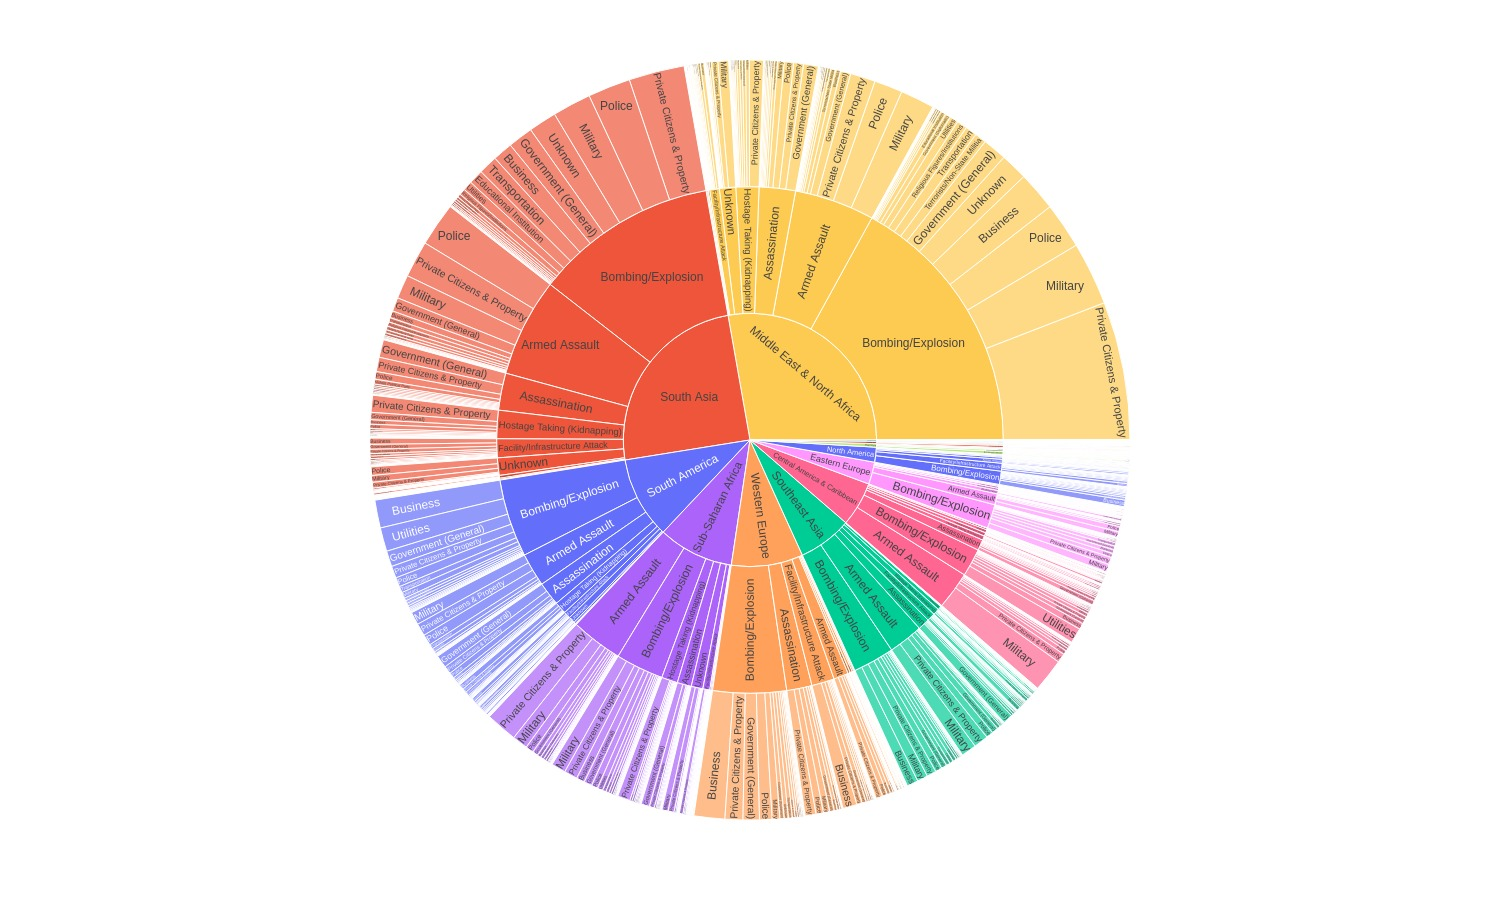

In [95]:
# Chart - 3 visualization code
fig = px.sunburst(attack_file, path=['Region', 'Attack_type','Target_typ'], values='Target_count',
                  color='Region', hover_data=['Target_typ'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(attack_file['Target_count'], weights=attack_file['Target_count']))

fig.update_layout(width=1500,height=900)
fig.show('jpg')

##### 1. Why did you pick the specific chart?

**Answer Here**.

Sunburst provides some beautiful functionalities to user.The dataframe consist some interlinkages with each other. So to represent the relation between 'Region' and 'Attack Type' it is the most suitable graph.



##### 2. What is/are the insight(s) found from the chart?

**Answer Here**.

In most of the regions,**Bombing and Explosions** is the most frequent attack type.Nearly every region is severely affected due to the **Bombing and Explosions**.

The number of attacks on different target types according to the different  attack types specified in the Region.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer Here**.

When countries got to know about the most frequent attack type, they work directly on prevention and dissemination of weapons related to the attack type.It will help them to regulate the law and order according to the type of attack.



## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

**Answer Here**.

> The Countries must work on comprehensive anti terror policies. Such Policies can be formulate in organisation like United Nations Security Councils.

> In today's new World order multilateralism is appreciated by most of the regions and their respective countries. This new way of diplomacy could also be helpful for curbing the menace of terrorism.

> Economy , Polity or Science could change with time and fluctuate but the Geography of countries never changed. If the same geography remained attached and aligned, where focus is on dissolving the boundaries and not demarcating the boundaries , problems like terrorism can never dominate over strong steadfast stature of countries.

> So deep connection between countries, people to people relations , respecting each other's foreign policy and not involving with any non state actors(for any kind of ill attack) will fetch countries strength and resilience to fight through any terror attacks.


# **Conclusion**

> Analyzing the effectiveness of counterterrorism policies and strategies can help to identify areas where improvements could be made. Exploring the Global Terrorism Dataset can help to identify trends and patterns in terrorist attacks over time, such as changes in the frequency, location, or methods of attacks. When the Taliban took control of Afghanistan, the whole world felt the grief of the Afghan people. Terrorism destroys every right and batters the person to his frightening death. In the above analysis, various study heads have been found which could be easily studied by countries to curb the menace of terrorism.

### **Terrorism do not just destroys the land but it destroys the peace,harmony, trust on humanity, the whole youth and cultivates the seeds of hatred and envy.**

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***